<a href="https://colab.research.google.com/github/TheSeems/HseNotebooks/blob/main/Akhundov_algebra_9_2020_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy
from sympy import  Point, Line, Segment, Polygon, RegularPolygon
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
import matplotlib.pyplot as plt

# Занятие 9
# Алгебра
##  Geometry: многоугольники на плоскости, принадлежность точки многоугольнику.
### Задание 1.
Построить равнобедренный треугольник АВС (АВ = ВС) с вершиной В в начале координат, так что биссектриса ВD образует угол 45 градусов с положительным направлением оси ОХ и 30 градусов со стороной АВ, точка А расположена между осью OY и лучом ВD,  длина АС равна 3. 

У полученного треугольника вывести на экран длины сторон.

Указание: напротив угла 30 градусов в прямоугольном треугольнике лежит катет, равный половине гипотенузы, в равнобедренном треугольнике биссектриса, проведенная к основанию, является медианой и высотой. Координаты точки равны произведению длины отрезка, соединяющего точку с началом координат и косинуса (синуса) угла, образованного этим отрезком и положительным направлением горизонтальной оси.

In [43]:
def draw_polygon(polygon, names=None, color='g'):
  ax = plt.gca()
  ax.set_aspect('equal')
  vertices = polygon.vertices
  points_x = [item.x for item in vertices] + [vertices[0].x]
  points_y = [item.y for item in vertices] + [vertices[0].y]
  ax.plot(points_x, points_y, color)
  if names == None:
    for i, x_coord in enumerate(points_x[:-1]):
      ax.annotate('A' + str(i + 1), xy=(x_coord, points_y[i] + 0.1), xycoords='data')
  else:
    for i, vert in enumerate(vertices):
      ax.annotate(names[vert],
      xy=(points_x[i], points_y[i] + 0.1), xycoords='data')

def draw_points(vertices, names=None):
  ax = plt.gca()
  ax.set_aspect('equal')
  ks = list(vertices.keys())
  points_x = [item.x for item in ks] + [ks[0].x]
  points_y = [item.y for item in ks] + [ks[0].y]
  for i, vert in enumerate(vertices):
    ax.annotate(vertices[vert], xy=(points_x[i], points_y[i] + 0.1), xycoords='data')

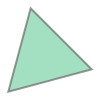

Стороны: 3, 3, 3, 

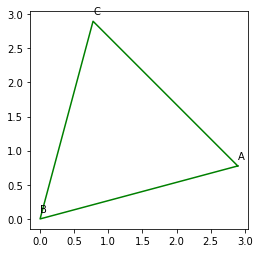

In [4]:
Len_AC = 3
A = Point(Len_AC * sympy.cos(sympy.pi / 12), Len_AC * sympy.sin(sympy.pi / 12))
B = Point(0, 0)
C = Point(Len_AC * sympy.sin(sympy.pi / 12), Len_AC * sympy.cos(sympy.pi / 12))

ABC = Polygon(A, B, C)
ABC = sympy.simplify(ABC)
A, B, C = ABC.vertices

display(ABC)
draw_polygon(ABC, {
    A: 'A',
    B: 'B',
    C: 'C'
})

print('Стороны:', end = ' ')
for side in ABC.sides:
  print(sympy.simplify(side.length), end = ', ')

### Задание 2.
Построить четырехугольник ABCD, где точки A, B и C из Задания 1, а точка D - центр ABC. Найти площадь, периметр и центр ABCD.
Изобразить ABC и ABCD на графике. Выпуклый ли многоугольник?

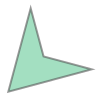

Площадь:  -3*sqrt(3)/2
Периметр:  2*sqrt(3) + 6
Центр:  Point2D(5*sqrt(6)/12, 5*sqrt(6)/12)
Выпуклый:  False 



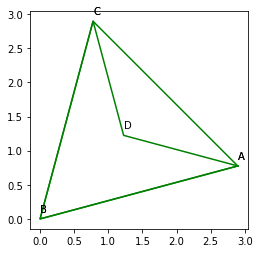

In [8]:
D = ABC.centroid

ABCD = Polygon(A, B, C, D)
display(ABCD)

draw_polygon(ABC, {
    A: 'A',
    B: 'B',
    C: 'C'
})
draw_polygon(ABCD, {
    A: 'A',
    B: 'B',
    C: 'C',
    D: 'D'
})

print('Площадь: ', ABCD.area)
print('Периметр: ', ABCD.perimeter)
print('Центр: ', ABCD.centroid)
print('Выпуклый: ', ABCD.is_convex(), '\n')

### Задание 3
Постоить ромб ALCD с точками A, C и D из Заданий 1 и 2. Найти общую часть треугольника BLC и ромба и вывести на экран в виде имен точек, отрезков и т.п., изобразить на графике  треугольник зеленым, ромб - фиолетовым. 

Указание: диагонали ромба пересекаются в серединах; имя точки искать в словаре имен.

Видим, что это треугольник DLC, поскольку B, D, M, L лежат на одной прямой


[Segment2D(Point2D(sqrt(6)/2, sqrt(6)/2), Point2D(sqrt(6), sqrt(6))),
 Segment2D(Point2D(sqrt(6), sqrt(6)), Point2D(-3*sqrt(2)/4 + 3*sqrt(6)/4, 3*sqrt(2)/4 + 3*sqrt(6)/4)),
 Segment2D(Point2D(-3*sqrt(2)/4 + 3*sqrt(6)/4, 3*sqrt(2)/4 + 3*sqrt(6)/4), Point2D(sqrt(6)/2, sqrt(6)/2))]

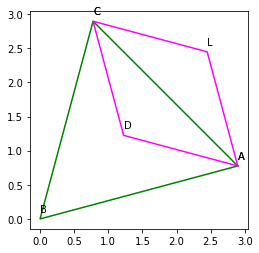

In [48]:
AC_seg = Segment(A, C)
DM_perp = AC_seg.perpendicular_line(D)
M = list(DM_perp.intersect(AC_seg))[0]
DM_distance = AC_seg.distance(D)

L = M - DM_perp.direction.unit * DM_distance

print('Видим, что это треугольник DLC, поскольку B, D, M, L лежат на одной прямой')
DLC = Polygon(D, L, C)
display(DLC.sides)

draw_polygon(ABC, {
    A: 'A',
    B: 'B',
    C: 'C'
})

ALCD = Polygon(A, L, C, D)
draw_polygon(ALCD, {
    A: 'A',
    L: 'L',
    C: 'C',
    D: 'D'
}, color = 'magenta')

### Индивидуальное задание

Построить на одном графике правильный треугольник, шестиугольник и восьмиугольник с радиусом описанной окружности $R$, центром в точке O.

Повернуть треугольник на $\alpha$ градусов, изобразить старый и новый треугольники на одном графике.

Найти общую область правильного шестиугольника и его копии, повернутой на угол $\beta$ градусов.

Вариант N 4

$R = 3$, $\alpha = 135$, $\beta = 90$, O(-9, 2).



 Треугольник, шестиугольник, восьмиугольник 



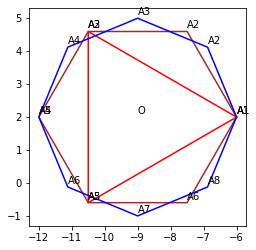


 Два треугольника 



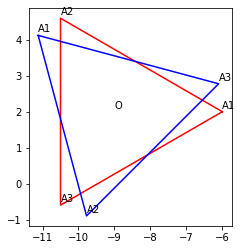


 Два шестиугольника 

Общая площадь:  

27/4 + 81*sqrt(3)/4

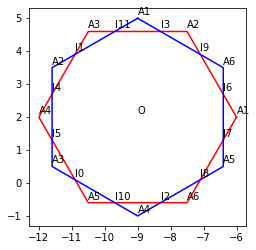

In [86]:
O = Point(-9, 2)
R = 3
alpha = 135 * sympy.pi / 180
beta = 90 * sympy.pi / 180

triangle = RegularPolygon(O, R, 3)
hexagon = RegularPolygon(O, R, 6)
octogon = RegularPolygon(O, R, 8)

alt_triangle = triangle.rotate(0)
alt_triangle.spin(alpha)
alt_hexagon = hexagon.rotate(0)
alt_hexagon.spin(beta)

print('\n', 'Треугольник, шестиугольник, восьмиугольник', '\n')
draw_points({O: 'O'})
draw_polygon(triangle, color='red')
draw_polygon(hexagon, color='brown')
draw_polygon(octogon, color='blue')

plt.show()

print('\n', 'Два треугольника', '\n')
draw_points({O: 'O'})
draw_polygon(triangle, color='red')
draw_polygon(alt_triangle, color='blue')

plt.show()

print('\n', 'Два шестиугольника', '\n')
draw_points({O: 'O'})
draw_polygon(hexagon, color='red')
draw_polygon(alt_hexagon, color='blue')

intersection = hexagon.intersect(alt_hexagon)
intersection_points = list(intersection)
intersection_poly = Polygon(*intersection_points)

point_dict = {}
for i, point in enumerate(intersection_points):
  point_dict[point] = 'I' + str(i)

draw_points(point_dict)
print('Общая площадь: ', end=' ')
display(hexagon.area + alt_hexagon.area - intersection_poly.area) # Формула включений-исключений
print('')